In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
from keras import backend as K
K.set_learning_phase(1)


In [3]:
series=df1=pd.read_csv('jpr.csv')

In [4]:
series.shape

(776, 1)

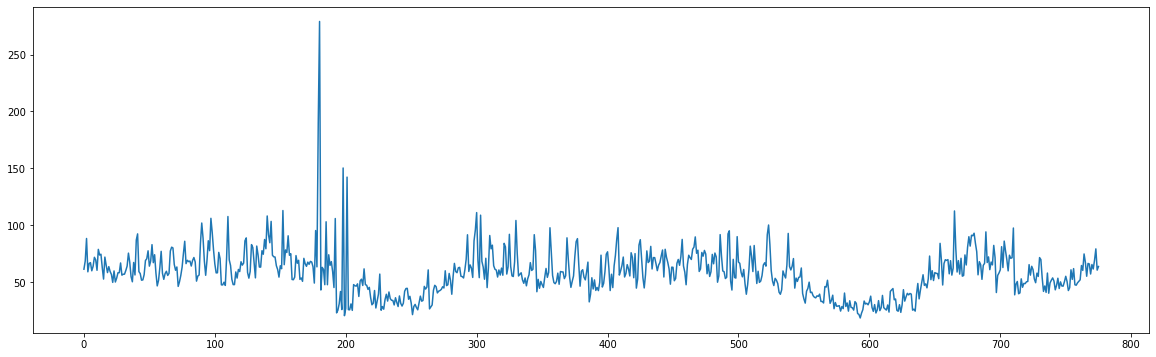

In [5]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

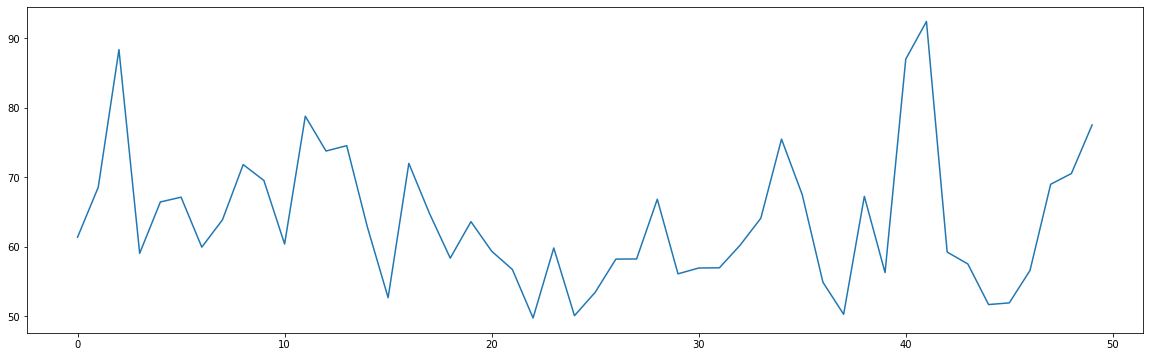

In [6]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])
pyplot.show()

In [257]:
series=df1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)


In [258]:
window_size = 15

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [259]:

series.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-0.670835,-0.615680,-0.463793,-0.688631,-0.631942,-0.626649,-0.681804,-0.651580,-0.590672,-0.608239,-0.678352,-0.537281,-0.575713,-0.569807,-0.659788,-0.737573
1,-0.615680,-0.463793,-0.688631,-0.631942,-0.626649,-0.681804,-0.651580,-0.590672,-0.608239,-0.678352,-0.537281,-0.575713,-0.569807,-0.659788,-0.737573,-0.589368
2,-0.463793,-0.688631,-0.631942,-0.626649,-0.681804,-0.651580,-0.590672,-0.608239,-0.678352,-0.537281,-0.575713,-0.569807,-0.659788,-0.737573,-0.589368,-0.644753
3,-0.688631,-0.631942,-0.626649,-0.681804,-0.651580,-0.590672,-0.608239,-0.678352,-0.537281,-0.575713,-0.569807,-0.659788,-0.737573,-0.589368,-0.644753,-0.693925
4,-0.631942,-0.626649,-0.681804,-0.651580,-0.590672,-0.608239,-0.678352,-0.537281,-0.575713,-0.569807,-0.659788,-0.737573,-0.589368,-0.644753,-0.693925,-0.653651


In [260]:
series.shape

(761, 16)

In [261]:

nrow = round(0.8*series.shape[0])

In [262]:

train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [263]:
#from sklearn.utils import shuffle
#train = shuffle(train)

In [264]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [265]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [266]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(609, 15)
(609,)
(152, 15)
(152,)


In [267]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [268]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(609, 15, 1)
(609,)
(152, 15, 1)
(152,)


In [279]:
model = Sequential()
model.add(LSTM(input_shape = (window_size,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(15, 1), return_sequences=True, units=50)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 15, 50)            10400     
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 256)               314368    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [343]:

start = time.time()
model.fit(train_X,train_y,batch_size=512,nb_epoch=5,validation_data=(test_X,test_y))
print("> Compilation Time : ", time.time() - start)

Train on 609 samples, validate on 152 samples
Epoch 1/5
609/609 [==============================] - 0s 192us/step - loss: 0.0228 - val_loss: 0.0126
Epoch 2/5
512/609 [========================>.....] - ETA: 0s - loss: 0.0199

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


609/609 [==============================] - 0s 172us/step - loss: 0.0236 - val_loss: 0.0122
Epoch 3/5
609/609 [==============================] - 0s 180us/step - loss: 0.0242 - val_loss: 0.0138
Epoch 4/5
609/609 [==============================] - 0s 177us/step - loss: 0.0233 - val_loss: 0.0114
Epoch 5/5
609/609 [==============================] - 0s 175us/step - loss: 0.0229 - val_loss: 0.0132
> Compilation Time :  0.5545170307159424


In [344]:
preds = model.predict(test_X)

In [345]:
preds.shape

(152, 1)

In [346]:
preds = scaler.inverse_transform(preds)

In [347]:
test_y.shape

(152,)

In [348]:
actuals = scaler.inverse_transform(test_y.reshape(-1, 1))

In [349]:
from math import sqrt

In [350]:
sqrt(mean_squared_error(actuals,preds))

14.973181471730577

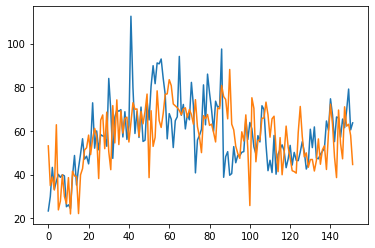

In [351]:

pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

In [21]:
LSTM?